# Extraction of $m_A$ from the ratio of low to high proton momentum in the selected CCQE-like events

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]
overlay_scalings = dict()
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.91': {   '1mu-1p': 0.024262743077631366,
                                            'CC 1p 0pi': 0.024262743077631366,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.23209992756589928,
                                            'other pairs': 0.024262743077631366}}
applied cuts to overlay
applied cuts to data


## The proton momentum reconstruction

In [6]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_gen_vs_rec_CCIpOpi.pdf


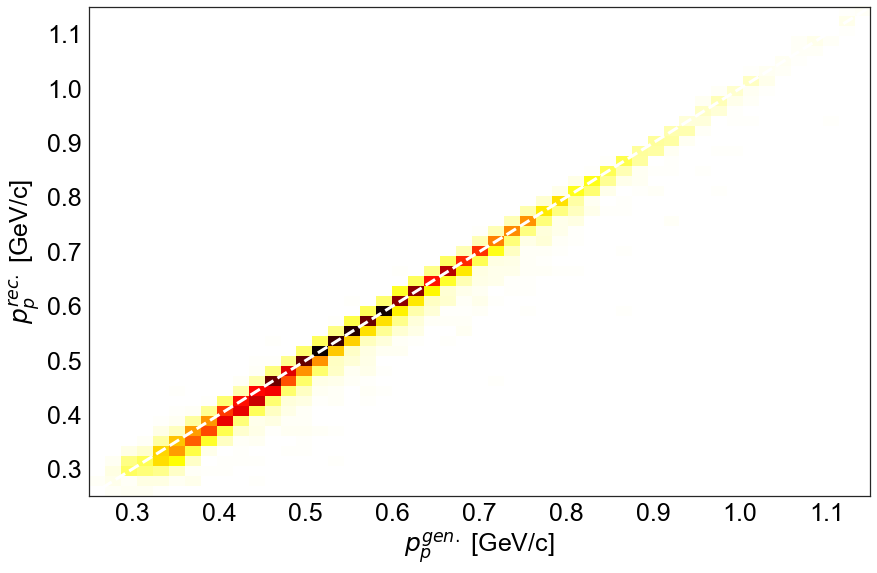

In [7]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Pp'],selected_CC1p0pi['reco_Pp']
             ,bins=linspace(0.25,1.15,50),ax=ax);
ax.plot([0.25,1.15],[0.25,1.15],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$p_p^{gen.}$ [GeV/c]',r'$p_p^{rec.}$ [GeV/c]',do_add_legend=True)
save_figure(figures_path+'Pp_gen_vs_rec_CCIpOpi.pdf')

mean,sigma: 0.0103245219773 0.0209925068221
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_gen_rec_CCIpOpi.pdf


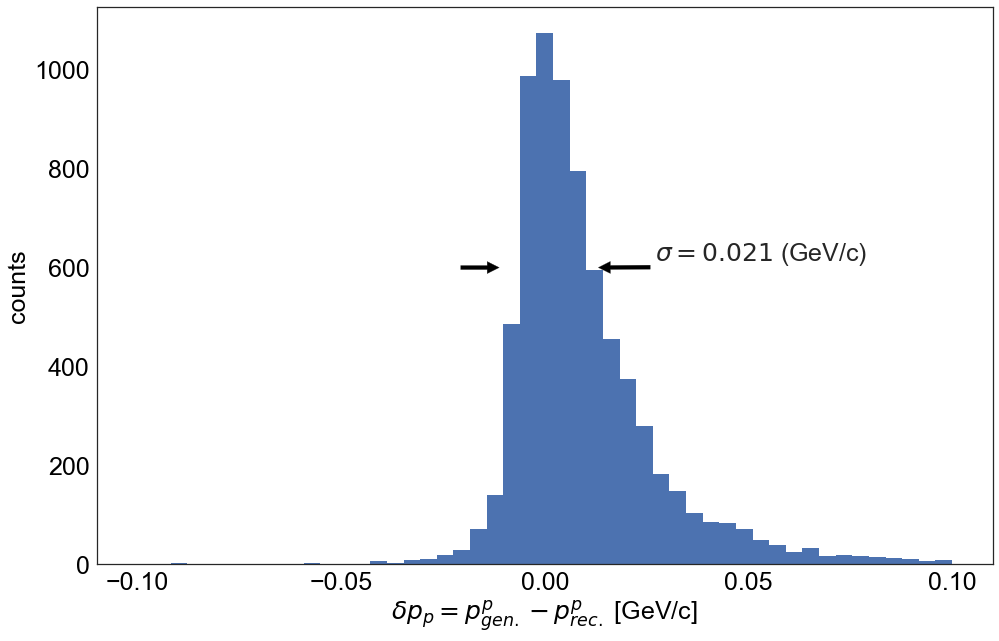

In [17]:
fig,ax=plt.subplots(figsize=(14,9))
# res = Gaussian_resolution(df=selected_CC1p0pi,vgen='truth_Pp',vrec='reco_Pp'
#                         ,bins=linspace(-0.1,0.1,50),do_plot_bestfit=True)
# ax.bar(res['mid'],res['histo'],width=res['bin_width'])
# plt.text(0.02,30,('best fit:'
#                +'\n'               
#                + r'$\mu=%.1f\pm$%.1f MeV/c'%(1000*res['mu'],1000*res['mu_err'])
#                +'\n'                
#                + r'$\sigma=%.1f\pm$%.1f MeV/c'%(1000*res['sigma'],1000*res['sigma_err']))
#          ,fontsize=25)
delta = selected_CC1p0pi['truth_Pp'] - selected_CC1p0pi['reco_Pp']
truncated = selected_CC1p0pi[np.abs(delta)<0.6]
delta_truncated = truncated['truth_Pp'] - truncated['reco_Pp']
mean,sigma = np.mean(delta_truncated),np.std(delta_truncated)
plt.hist(delta,bins=linspace(-0.1,0.1,50))
ax.annotate('',xy=(mean-sigma,600),xytext=(mean-1.5*sigma,600),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(r'$\sigma=%.3f$ (GeV/c)'%(sigma),xy=(mean+0.1*sigma,600),xytext=(mean+0.8*sigma,615),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\delta p_{p} = p^p_{gen.}-p^p_{rec.}$ [GeV/c]','counts'
         ,do_add_legend=True,xticks=(-0.1,-0.05,0,0.05,0.1))
plt.tight_layout()
save_figure(figures_path+'Pp_gen_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_gen_rec_gen_CCIpOpi.pdf


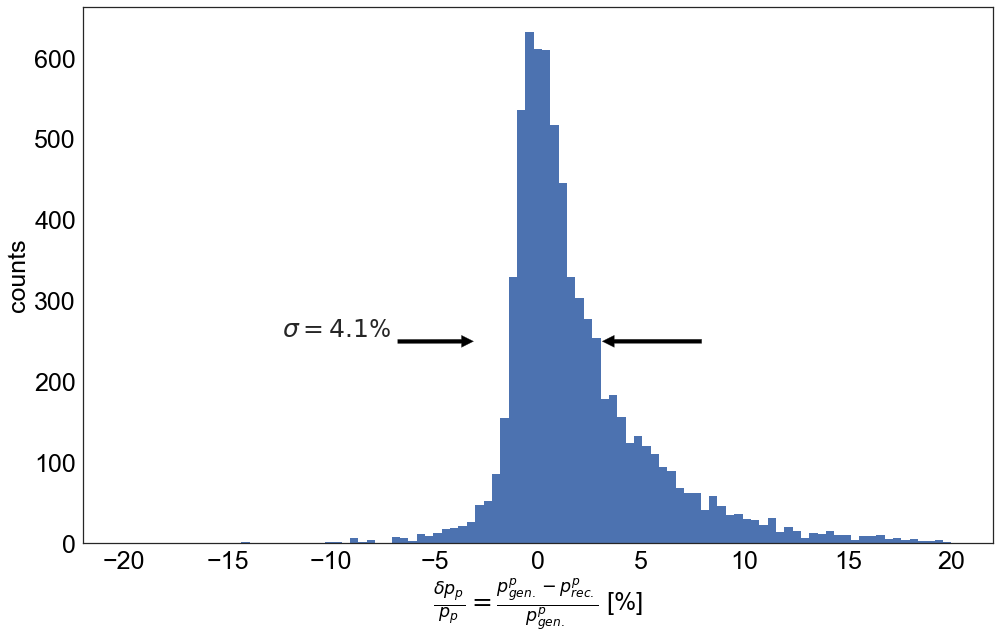

In [23]:
fig,ax=plt.subplots(figsize=(14,9))
# res = Gaussian_relative_resolution(df=selected_CC1p0pi,vgen='truth_Pp',vrec='reco_Pp'
#                         ,bins=linspace(-20,20,100),do_plot_bestfit=True)
# ax.bar(res['mid'],res['histo'],width=res['bin_width']
#        ,label=('best fit:'
#                +'\n'               
#                + r'$\mu=%.1f\pm$%.1f'%(res['mu'],res['mu_err'])+'%'
#                +'\n'                
#                + r'$\sigma=%.2f\pm$%.2f'%(res['sigma'],res['sigma_err']))+'%')
R = 100*(selected_CC1p0pi['truth_Pp'] - selected_CC1p0pi['reco_Pp'])/selected_CC1p0pi['truth_Pp']
truncated = selected_CC1p0pi[np.abs(R)<100]
R_truncated = 100*(truncated['truth_Pp'] - truncated['reco_Pp'])/truncated['truth_Pp']
mean,sigma = np.mean(R_truncated),np.std(R_truncated)
plt.hist(R,bins=linspace(-20,20,100))
ax.annotate((r'$\sigma=%.1f$'%(sigma)+'%'),xy=(mean-1.2*sigma,250),xytext=(mean-3.5*sigma,256),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('',xy=(mean+0.2*sigma,250),xytext=(mean+1.5*sigma,250),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\frac{\delta p_{p}}{p_p} = \frac{p^p_{gen.}-p^p_{rec.}}{p^p_{gen.}}$ [%]','counts'
         ,do_add_legend=True)
plt.tight_layout()
save_figure(figures_path+'Pp_gen_rec_gen_CCIpOpi.pdf')

# The proton momentum distribution in the selected CCQE-like events

In [249]:
var,x_label,bins='reco_Pp',r'$p_{p}$ [GeV/c]',linspace(0.2,1.2,11)
xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width)

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/reco_Pp_selected_events.pdf


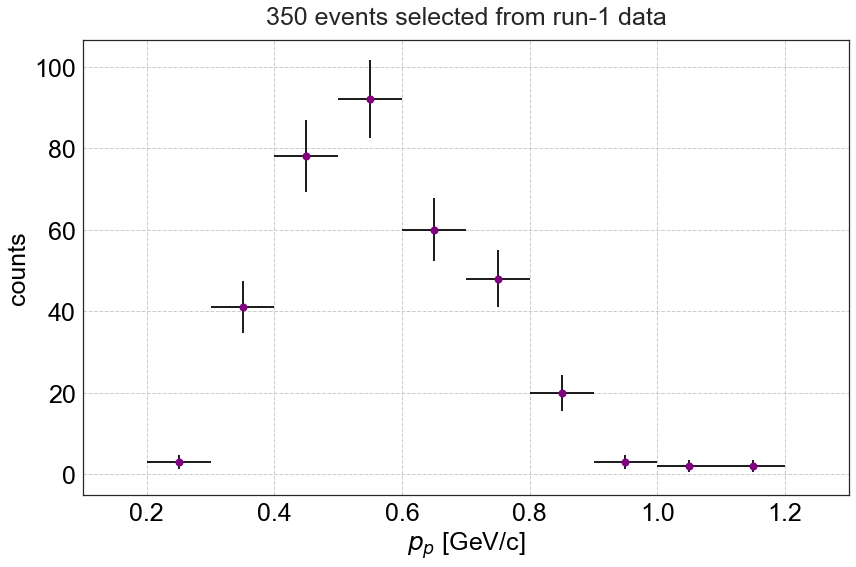

In [189]:
fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1)
plt.tight_layout()
save_figure(figures_path+'reco_Pp_selected_events.pdf')

## Correcting the measured proton momentum distribution for background impurities and signal inefficiencies

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_purity_after_cuts.pdf


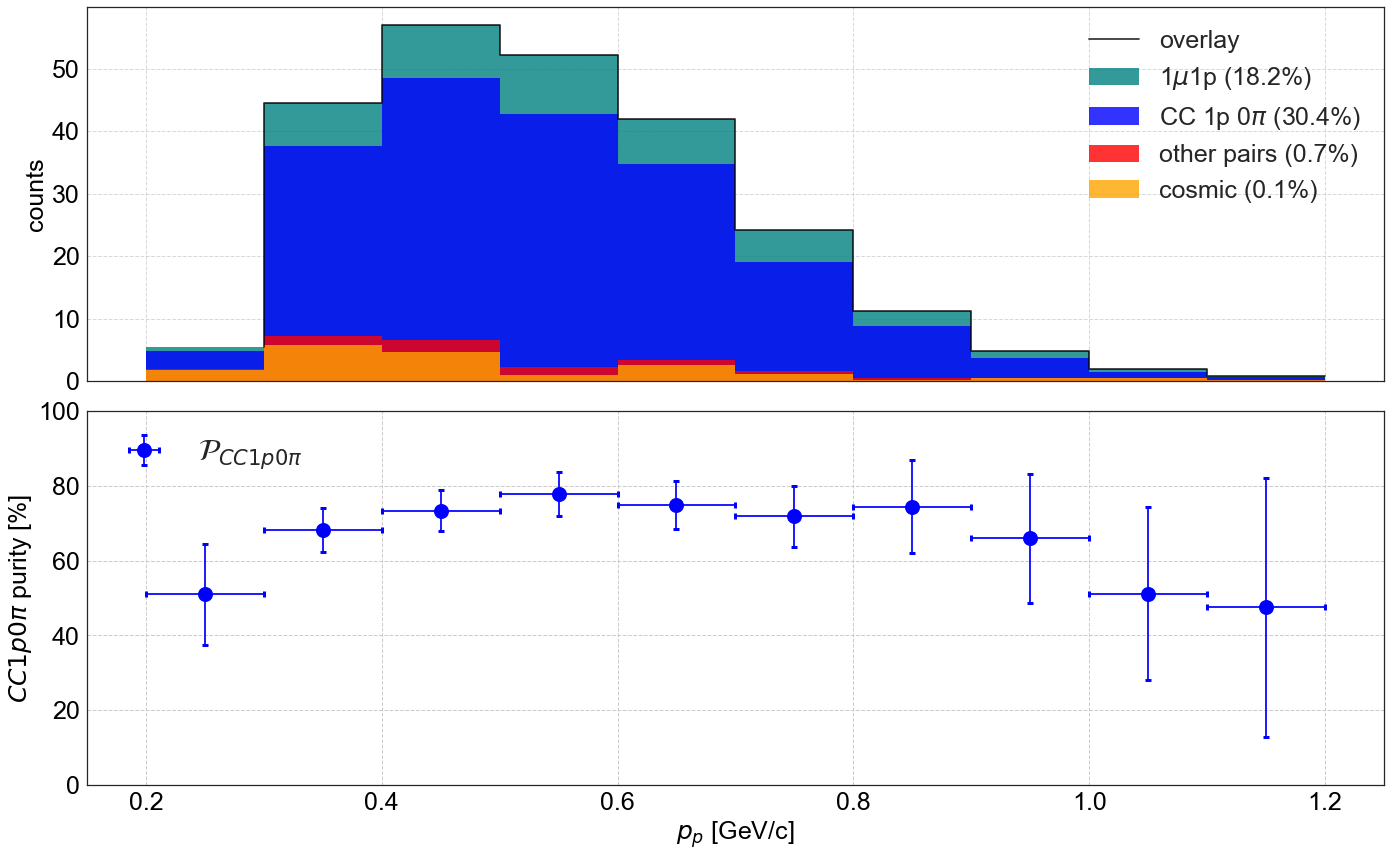

In [239]:
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                                 , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                                 , ax=ax, var=var, x_label='',y_label='counts', bins=bins 
                                 , remove_ticks_x=True
                                 , fontsize=25, stackColor='black',stackLabel='overlay'
                              );
ax.legend(fontsize=25)
ax = fig.add_subplot(2,1,2)
mid,purity,purity_err = plot_purity( OverlaySamples=selected_overlay,debug=0               
            , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                               
            , ax=ax, var=var, bins=bins 
            , purity_pair_type='CC 1p 0pi'            
            , x_label=x_label, y_label=r'$CC1p0\pi$ purity [%]'                            
            , color='blue', ecolor='blue',label=r'$\mathcal{P}_{CC 1p 0\pi}$'
           );
plt.legend(fontsize=30)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Pp_purity_after_cuts.pdf')

# The $CC1p0\pi$ efficiency is taken from the entire sample of $CC1p0\pi$ events in the overlay

In [224]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'

926088  GENIE interaction


In [225]:
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π events in overlay'

243732 GENIE CC1p0π events
7304 selected CC1p0π events in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_efficiency_after_cuts.pdf


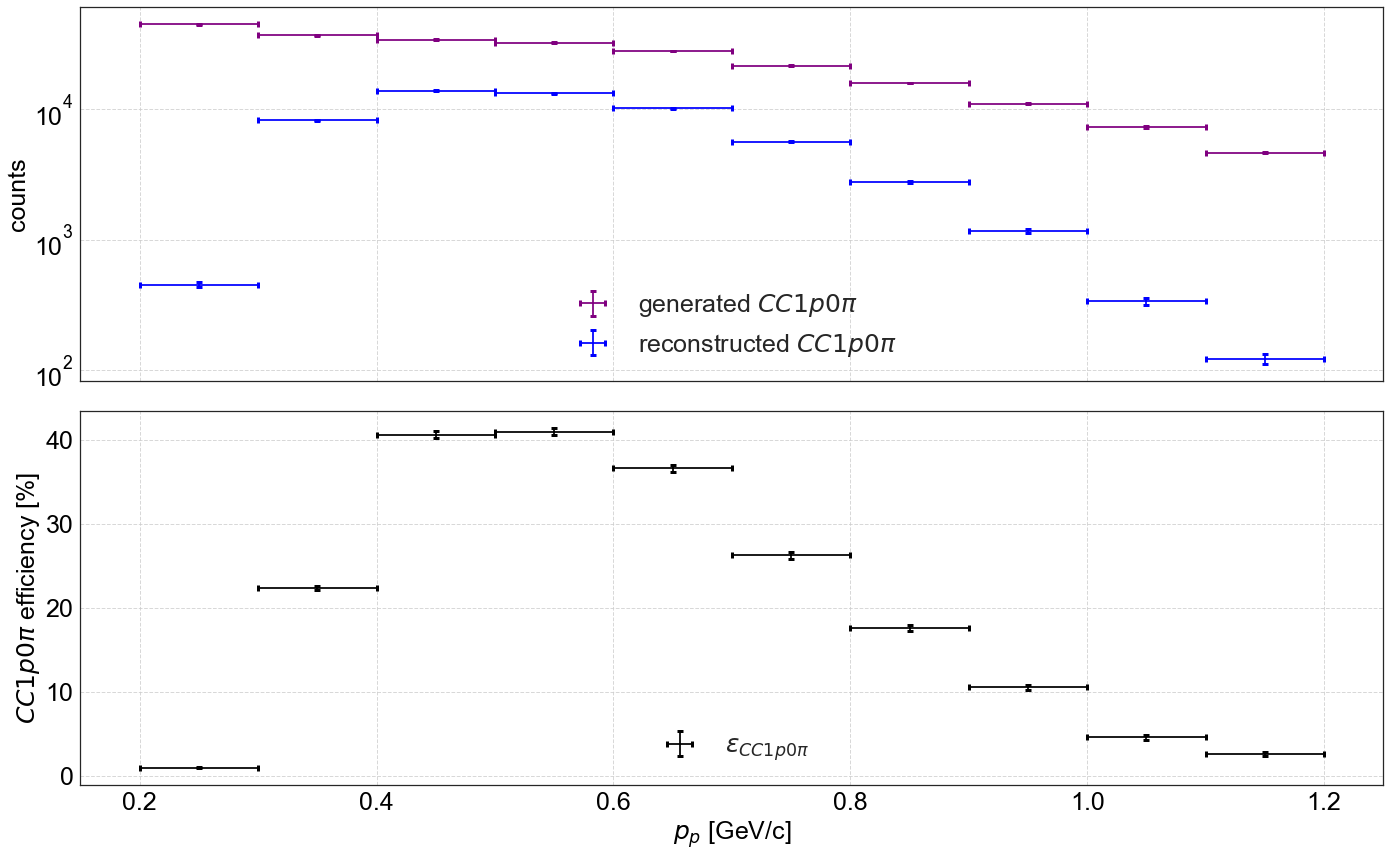

In [243]:
overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h = dict()
for sam,sname,slabel,color in zip([GENIE_CC1p0pi,selected_CC1p0pi]
                                  ,['gen','rec']
                                  ,['generated $CC 1p 0\pi$','reconstructed $CC 1p 0\pi$']                               
                                  ,['purple','blue']):
    h[sname],edges = np.histogram(sam['truth_Pp'],bins=bins)
    if sname=='rec':
        h[sname] = h[sname]*overlay_scaling['N(Ovelay)/N(On)']
    mid = 0.5*(edges[1:]+edges[:-1])
    bin_width=0.5*(edges[1]-edges[0])
    plt.errorbar(x=mid,xerr=bin_width,y=h[sname],yerr=np.sqrt(h[sname]),color=color
                 ,markersize=2,fmt='s',capsize=3,capthick=3,label=slabel)
set_axes(ax, x_label='', y_label=r'counts',remove_ticks_x=True
         ,do_add_grid=True,do_add_legend=True,legend_loc='lower center')
ax.set_yscale('log')

eff = h['rec']/h['gen']
eff_err = eff * np.sqrt(1./h['rec'] + 1./h['gen'])

ax = fig.add_subplot(2,1,2)
plt.errorbar(x=mid , xerr=bin_width , y=100*eff , yerr=100*eff_err , color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3,label=r'$\epsilon_{CC 1p 0\pi}$')
set_axes(ax, x_label=x_label
         , y_label=r'$CC1p0\pi$ efficiency [%]',yticks=[0,10,20,30,40]
         ,do_add_grid=True,do_add_legend=True,legend_loc='lower center')
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Pp_efficiency_after_cuts.pdf')

# The $CC1p0\pi$ correction is the purity/efficiency

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/Pp_correction_after_cuts.pdf


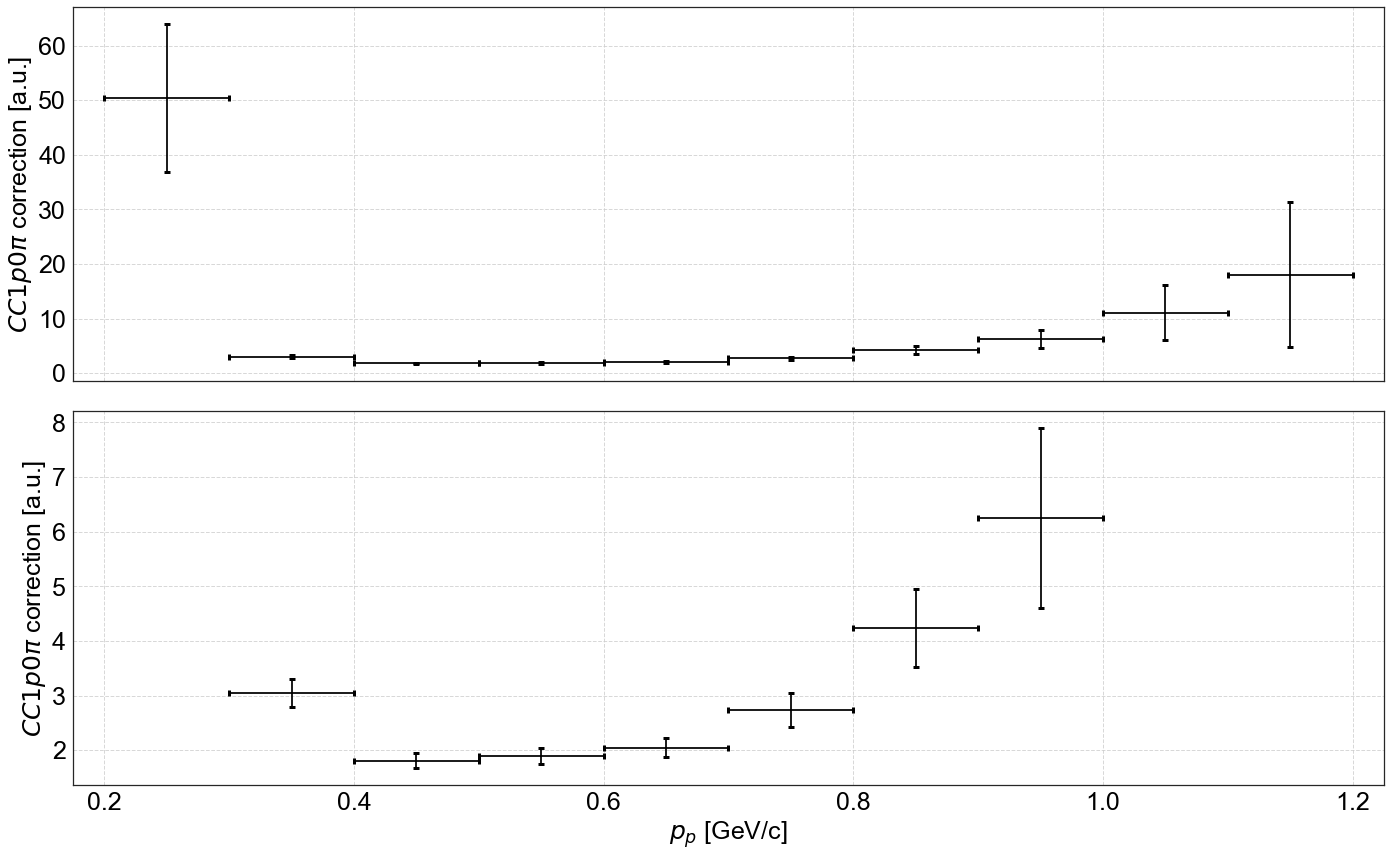

In [251]:
C = purity/eff
C_err = C * np.sqrt( np.square(purity_err/purity) + np.square(eff_err/eff))

fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
plt.errorbar(x=mid , xerr=bin_width , y=C , yerr=C_err 
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(ax, x_label='',xlim=xlim,remove_ticks_x=True
         , y_label=r'$CC1p0\pi$ correction [a.u.]'
         ,do_add_grid=True,do_add_legend=True)

ax = fig.add_subplot(2,1,2)
plt.errorbar(x=mid[1:-2] , xerr=bin_width , y=C[1:-2] , yerr=C_err[1:-2]
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(ax, x_label=x_label,xlim=xlim
         , y_label=r'$CC1p0\pi$ correction [a.u.]'
         ,do_add_grid=True,do_add_legend=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Pp_correction_after_cuts.pdf')

## now apply the correction to the data

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/reco_Pp_selected_events_corrected.pdf


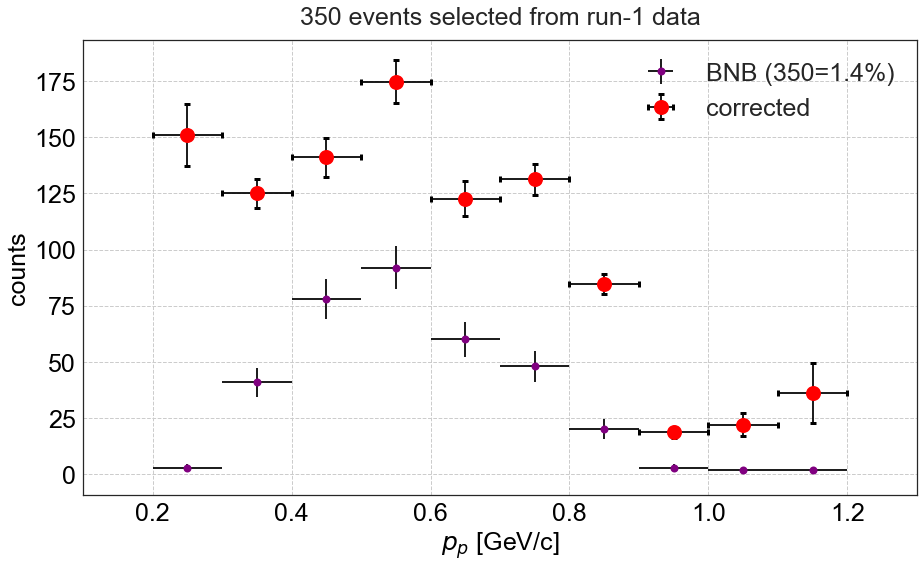

In [257]:
fig=plt.figure(figsize=(12.944,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
h_OnBeam_corrected = h_OnBeam*C
h_OnBeam_corrected_err = np.sqrt(h_OnBeam + np.square(C_err))

plt.errorbar(x=mid , xerr=bin_width , y=h_OnBeam_corrected , yerr=h_OnBeam_corrected_err
             ,color='red',ecolor='black',label='corrected'
             ,markersize=15,fmt='o',capsize=3,capthick=3)


set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1,do_add_legend=True)
plt.tight_layout()
save_figure(figures_path+'reco_Pp_selected_events_corrected.pdf')

# look for the distribution only two bins - to extract mA

In [2]:
Ppmin_bins = [0.1,0.4]
Ppmax_bins = [Ppmin_bins[1],0.6]